## **1-Importando Biblioteca**

In [1]:
import cv2
import matplotlib.pyplot as plt
import zipfile

cv2.__version__

'4.1.2'

## **2-Conectando ao google drive**






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pose_path = '/content/drive/My Drive/Colab Notebooks/Reconhecimento de Gestos e Ações com Python e OpenCV/pose.zip'
zip_object = zipfile.ZipFile(file = pose_path, mode = "r")
zip_object.extractall("./")

In [0]:
imagens_path = '/content/drive/My Drive/Colab Notebooks/Reconhecimento de Gestos e Ações com Python e OpenCV/imagens.zip'
zip_object = zipfile.ZipFile(file = imagens_path, mode = "r")
zip_object.extractall("./")
zip_object.close()

## **3- Carregando modelo mobii e COCO/Pre rede neural**

In [0]:
arquivo_proto = '/content/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arquivo_pesos = '/content/pose/body/mpi/pose_iter_160000.caffemodel'

## **4- Carregando imagem no drive**

In [0]:
imagem_body = cv2.imread('/content/imagens/body/multiple/multiple_1.jpeg')

In [7]:
imagem_body.shape

(640, 640, 3)

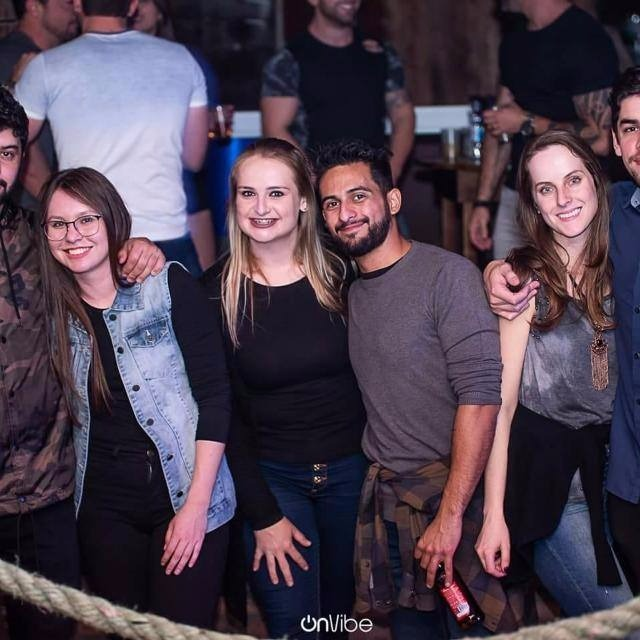

In [9]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagem_body)

In [0]:
imagem_largura = imagem_body.shape[1]
imagem_altura = imagem_body.shape[0]

In [11]:
imagem_altura, imagem_altura

(640, 640)

## **5- Carregando modelo**

In [0]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto,arquivo_pesos)

## **6- Definir dimensões da imagem de entrada**

In [0]:
altura_entrada = 368
largura_entrada = int((altura_entrada / imagem_altura)*imagem_largura)


In [16]:
largura_entrada

368

## **7- Converter imagem do formato openCV para formato blob caffe**

In [0]:
blob_entrada = cv2.dnn.blobFromImage(imagem_body,scalefactor = 1.0/255,
                                     size=(largura_entrada, altura_entrada),
                                     mean= (0,0,0), swapRB= False,
                                     crop = False)

## **8- Saida do mapa de calor**

In [0]:
modelo.setInput(blob_entrada)
saida = modelo.forward()

In [19]:
saida.shape

(1, 44, 46, 46)

In [20]:
saida[0][0]

array([[0.00049211, 0.00054041, 0.00080381, ..., 0.0004188 , 0.00048497,
        0.00056236],
       [0.00053339, 0.00058671, 0.00055662, ..., 0.00045707, 0.00048965,
        0.00057936],
       [0.00051214, 0.00057876, 0.00055863, ..., 0.00052235, 0.00050592,
        0.00054233],
       ...,
       [0.00052932, 0.00052271, 0.00055545, ..., 0.00058366, 0.00061254,
        0.00079496],
       [0.0005545 , 0.00055392, 0.00056722, ..., 0.00065917, 0.00077181,
        0.00096974],
       [0.00058384, 0.00059912, 0.00055851, ..., 0.00086402, 0.00097046,
        0.0009022 ]], dtype=float32)

In [0]:
ponto = 4
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))

(-0.5, 639.5, 639.5, -0.5)

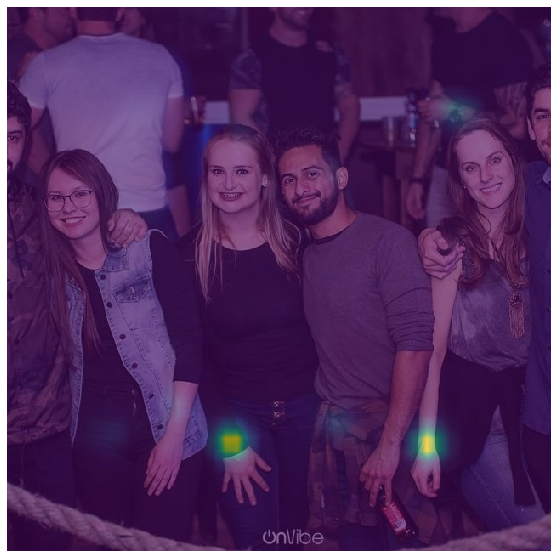

In [26]:
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(imagem_body, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca, alpha= 0.6)
plt.axis("off")